In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
DATADIR = "C:/Users/Zilehuma/Desktop/FYP/datasetIO"
CATEGORIES = ["indoor","outdoor"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break


<Figure size 640x480 with 1 Axes>

In [2]:
print(img_array.shape)

(768, 1024)


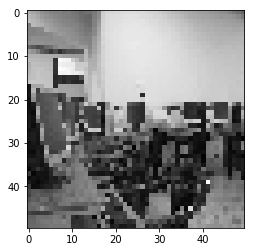

In [3]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()


In [4]:
training_data=[]

def create_training_dataset():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_dataset()


In [7]:
print(len(training_data))

4907


In [8]:
import random
random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
1
1
1
1
1
0


In [10]:
X = []
y = []

In [11]:
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [12]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [14]:
X[1]

array([[[ 28],
        [ 29],
        [ 28],
        ...,
        [ 31],
        [ 28],
        [ 30]],

       [[ 31],
        [ 32],
        [ 32],
        ...,
        [ 33],
        [ 32],
        [ 34]],

       [[ 30],
        [ 32],
        [ 29],
        ...,
        [ 32],
        [ 33],
        [ 31]],

       ...,

       [[ 39],
        [ 43],
        [ 42],
        ...,
        [145],
        [ 72],
        [ 62]],

       [[ 38],
        [ 40],
        [ 41],
        ...,
        [154],
        [ 43],
        [ 42]],

       [[ 39],
        [ 37],
        [ 36],
        ...,
        [ 57],
        [ 53],
        [ 55]]], dtype=uint8)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
#from keras.layers.convolutional import MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X= X/255.0
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])


history = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)


Instructions for updating:
Colocations handled automatically by placer.
Train on 4416 samples, validate on 491 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
4416/4416 [==============================] - 21s 5ms/sample - loss: 0.3671 - acc: 0.8270 - val_loss: 0.2895 - val_acc: 0.8737
Epoch 2/10
4416/4416 [==============================] - 17s 4ms/sample - loss: 0.2022 - acc: 0.9271 - val_loss: 0.2020 - val_acc: 0.9348
Epoch 3/10
4416/4416 [==============================] - 17s 4ms/sample - loss: 0.1521 - acc: 0.9457 - val_loss: 0.1969 - val_acc: 0.9328
Epoch 4/10
4416/4416 [==============================] - 17s 4ms/sample - loss: 0.1250 - acc: 0.9549 - val_loss: 0.1826 - val_acc: 0.9328
Epoch 5/10
4416/4416 [==============================] - 18s 4ms/sample - loss: 0.1018 - acc: 0.9640 - val_loss: 0.1662 - val_acc: 0.9348
Epoch 6/10
4416/4416 [==============================] - 17s 4ms/sample - loss: 0.0865 - acc: 0.9701 - val_loss: 0.1757 - val_acc: 0.9369
Epoch 7/10


In [16]:
model.save('indoor_outdoornew_classifier.model')

In [17]:
new_model = tf.keras.models.load_model('indoor_outdoornew_classifier.model')

In [1]:
import tensorflow as tf
import cv2

CATEGORIES = ["indoor", "outdoor"]

def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#img = cv2.imread('C:\test\IMG_5013.jpg')
#img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
#img = cv2.resize(img, (50, 50))
#img.reshape(-1, 50, 50, 1)

 

model = tf.keras.models.load_model("indoor_outdoornew_classifier.model")
prediction = model.predict([prepare('C:/test/a (18).jpeg')])
print(prediction)


print(CATEGORIES[int(prediction[0][0])])

prediction = model.predict([prepare('C:/test/a (19).jpeg')])
print(prediction)


print(CATEGORIES[int(prediction[0][0])])

prediction = model.predict([prepare('C:/test/a (20).jpeg')])
print(prediction)


print(CATEGORIES[int(prediction[0][0])])
prediction = model.predict([prepare('C:/test/a (21).jpeg')])
print(prediction)


print(CATEGORIES[int(prediction[0][0])])
prediction = model.predict([prepare('C:/test/a (22).jpeg')])
print(prediction)


print(CATEGORIES[int(prediction[0][0])])
prediction = model.predict([prepare('C:/test/a (23).jpeg')])
print(prediction)


print(CATEGORIES[int(prediction[0][0])])
prediction = model.predict([prepare('C:/test/a (24).jpeg')])
print(prediction)


print(CATEGORIES[int(prediction[0][0])])
prediction = model.predict([prepare('C:/test/a (25).jpeg')])
print(prediction)


print(CATEGORIES[int(prediction[0][0])])
prediction = model.predict([prepare('C:/test/a (26).jpeg')])
print(prediction)


print(CATEGORIES[int(prediction[0][0])])
prediction = model.predict([prepare('C:/test/a (27).jpeg')])
print(prediction)


print(CATEGORIES[int(prediction[0][0])])
prediction = model.predict([prepare('C:/test/a.jpg')])
print(prediction)


print(CATEGORIES[int(prediction[0][0])])
prediction = model.predict([prepare('C:/test/2 (1).jpeg')])
print(prediction)


print(CATEGORIES[int(prediction[0][0])])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[[1.]]
outdoor
[[0.]]
indoor
[[0.]]
indoor
[[1.]]
outdoor
[[0.]]
indoor
[[0.]]
indoor
[[1.]]
outdoor
[[0.]]
indoor
[[0.]]
indoor
[[1.]]
outdoor
[[0.]]
indoor
[[0.]]
indoor


In [4]:
prediction = model.predict([prepare('C:/test/hi.jpg')])

print(CATEGORIES[int(prediction[0][0])])

outdoor
